## Part 1 - Exploratory Data Analysis<a id='Part_Exploratory_Data_Analysis'></a>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
%matplotlib inline

In [3]:
# load data
import datetime

# convert login_time to datetime object
df = pd.read_json('/Users/felixoffei/Desktop/Springboard/Ultimate Technologies/ultimate_challenge/logins.json')
df['login_time'] = pd.to_datetime(df['login_time'], format="%Y-%m-%d %H:%M:%S")
df.head()

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# extract date and time from login_time
df['date'] = df['login_time'].dt.date
df['time'] = df['login_time'].dt.time

In [6]:
df.head()

login_time        date      time
0 1970-01-01 20:13:18  1970-01-01  20:13:18
1 1970-01-01 20:16:10  1970-01-01  20:16:10
2 1970-01-01 20:16:37  1970-01-01  20:16:37
3 1970-01-01 20:16:36  1970-01-01  20:16:36
4 1970-01-01 20:26:21  1970-01-01  20:26:21

In [7]:
# get year, month, day from date
df['date'] = df['date'].apply(pd.to_datetime)
df['year'] = [i.year for i in df['date']]
df['month'] = [i.month_name()[0:3] for i in df['date']]
df['day'] = [i.day_name()[0:3] for i in df['date']]

In [8]:
df.head()

login_time       date      time  year month  day
0 1970-01-01 20:13:18 1970-01-01  20:13:18  1970   Jan  Thu
1 1970-01-01 20:16:10 1970-01-01  20:16:10  1970   Jan  Thu
2 1970-01-01 20:16:37 1970-01-01  20:16:37  1970   Jan  Thu
3 1970-01-01 20:16:36 1970-01-01  20:16:36  1970   Jan  Thu
4 1970-01-01 20:26:21 1970-01-01  20:26:21  1970   Jan  Thu

In [9]:
df.tail()

login_time       date      time  year month  day
93137 1970-04-13 18:50:19 1970-04-13  18:50:19  1970   Apr  Mon
93138 1970-04-13 18:43:56 1970-04-13  18:43:56  1970   Apr  Mon
93139 1970-04-13 18:54:02 1970-04-13  18:54:02  1970   Apr  Mon
93140 1970-04-13 18:57:38 1970-04-13  18:57:38  1970   Apr  Mon
93141 1970-04-13 18:54:23 1970-04-13  18:54:23  1970   Apr  Mon

In [10]:
# count logins by date
df.groupby('date')['login_time'].count()

date
1970-01-01     112
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
              ... 
1970-04-09     818
1970-04-10    1009
1970-04-11    1352
1970-04-12    1409
1970-04-13     395
Name: login_time, Length: 103, dtype: int64

(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

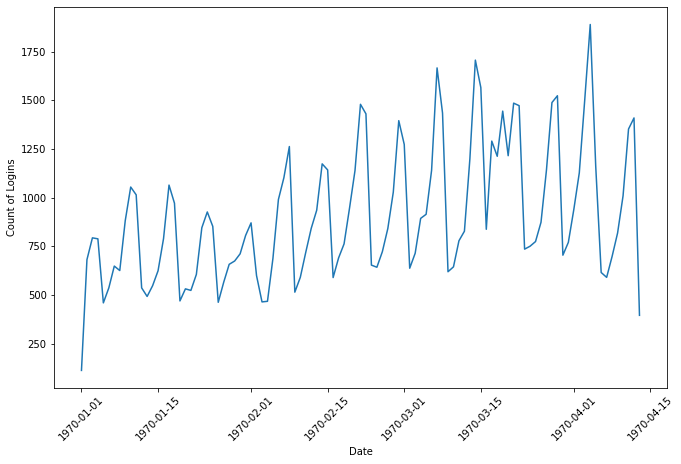

In [11]:
# plot of count of logins by date
plt.figure(figsize=(11,7))
plt.plot(df.groupby('date')['login_time'].count())
plt.ylabel('Count of Logins')
plt.xlabel('Date')
plt.xticks(rotation=45)

From the plot above, count of logins was steady from the first day of logins. 
The highest recorded login was somewhere between 1970-04-01 - 1970-04-05.

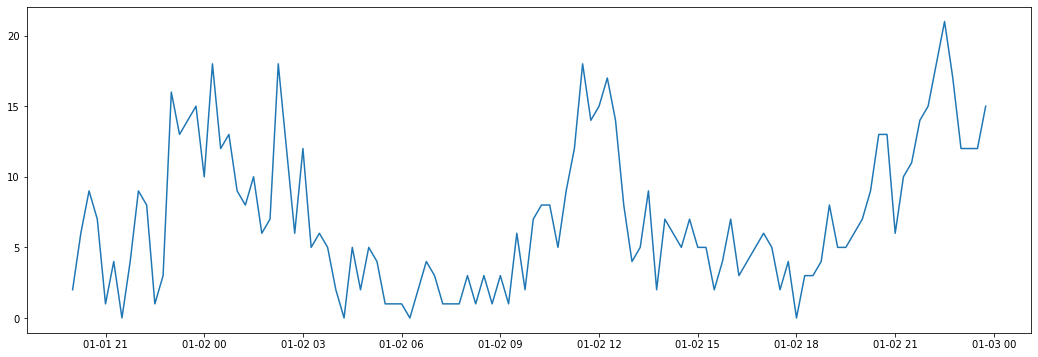

In [12]:
# login counts based on 15 minute time intervals
plt.figure(figsize=(18,6))
plt.plot(df[df['date'] < '1970-01-03'].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())

It is also obvious in this plot, logins was not stationary. The flactuating pattern can attributed inactivity during off peak hours. The maximum number of logins for a 15 min interval after 9pm on 01-02-1970.
Logins were kind of low during the mornings, and rises in the from rush hour time to midnight. Which is not surprising that more people are travelling during those hours, either from work and returning to work.

Text(0.5, 0, 'Time (15 minute intervals)')

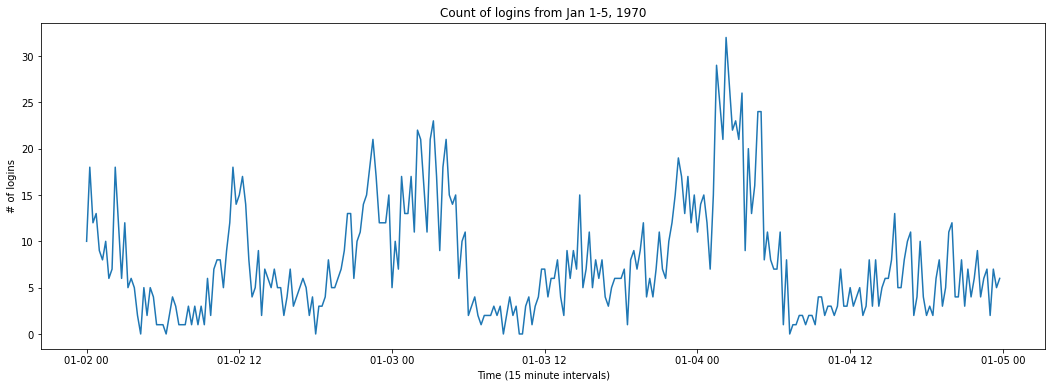

In [13]:
# login counts based on 15 minute time intervals (the first 5 days of Jan)
plt.figure(figsize=(18,6))
plt.plot(df[(df['date'] < '1970-01-05') & (df['date'] > '1970-01-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())
plt.title("Count of logins from Jan 1-5, 1970")
plt.ylabel('# of logins')
plt.xlabel('Time (15 minute intervals)')

Text(0.5, 0, 'Time (15 minute intervals)')

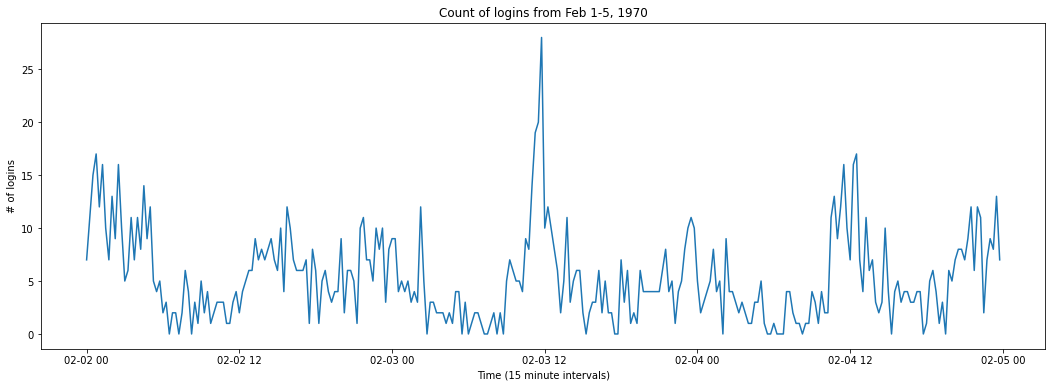

In [14]:
# login counts based on 15 minute time intervals (the first 5 days of Feb)
plt.figure(figsize=(18,6))
plt.plot(df[(df['date'] < '1970-02-05') & (df['date'] > '1970-02-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())
plt.title("Count of logins from Feb 1-5, 1970")
plt.ylabel('# of logins')
plt.xlabel('Time (15 minute intervals)')

Text(0.5, 0, 'Time (15 minute intervals)')

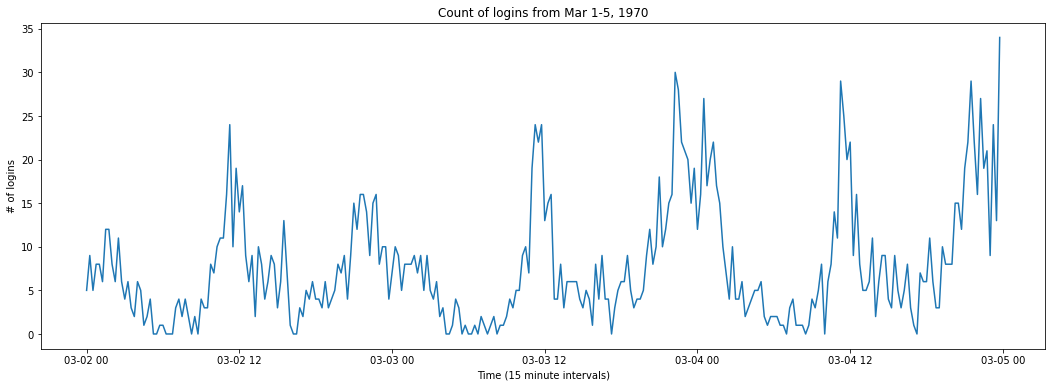

In [15]:
# login counts based on 15 minute time intervals (the first 5 days of March)
plt.figure(figsize=(18,6))
plt.plot(df[(df['date'] < '1970-03-05') & (df['date'] > '1970-03-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())
plt.title("Count of logins from Mar 1-5, 1970")
plt.ylabel('# of logins')
plt.xlabel('Time (15 minute intervals)')

Text(0.5, 0, 'Time (15 minute intervals)')

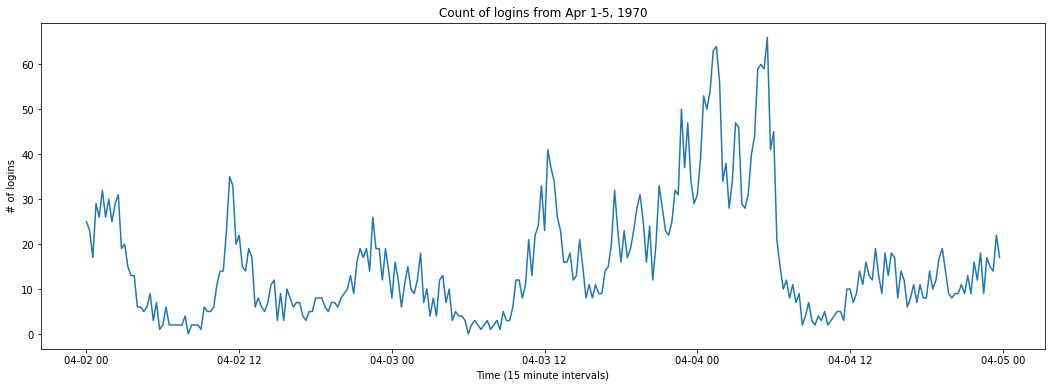

In [16]:
# login counts based on 15 minute time intervals (the first 5 days of Apr)
plt.figure(figsize=(18,6))
plt.plot(df[(df['date'] < '1970-04-05') & (df['date'] > '1970-04-01')].groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count().dropna())
plt.title("Count of logins from Apr 1-5, 1970")
plt.ylabel('# of logins')
plt.xlabel('Time (15 minute intervals)')

The above plots confirms that there is a steady rise in logins after midday through to midnight and low count of logins occur in the mornings.

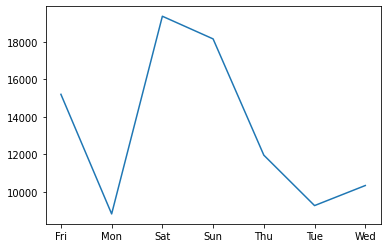

In [17]:
# count of logins by the day
plt.plot(df.groupby('day')['login_time'].count())

Highest logins was in Saturday and lowest was on Monday followed by Tuesday. On weekends there's a resonable activity as such we see the highest number of logins falls on a weekend. 

## Part 2 - Experiments and Metrics<a id='Part2_Experiments_and_Metrics'></a>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Part 2 - Solutions<a id='Part2_Solutions'></a>

1. If there's considerably busy traffic/schedules for both cities, I think that would encourage driver partners to be available in both cities. Because it wouldn't make for one city to be active/busy and the other is not, most drivers wouldn't go to the less busy traffic thus wasting money and time paying for the toll.
2. a. Since Ultimate Gotham is most active at night, drivers travelling to Ultimate Metropolis from Gotham should be charged a decent toll price, it could be half or 3/4 of the toll. And same goes to drivers from Ultimate Metropolis  to Gotham during the day.
b. If there was statistically significant increase in traffic over the bridge when toll prices was reduced during off peak hours for driver partners in both cities.
c. If the test was statistically significant, there would more activity on the bridge leading to traffic and as result since driver partners in both directions even during off peak hours. This thereby creates excess revenue for both cities compared to when driver partners were reluctant to use the bridge during their off peak hours.

## Part 3 - Predictive Modeling<a id='Part3_Predictive_Modeling'></a>

In [18]:
# load data
import json

with open("/Users/felixoffei/Desktop/Springboard/Ultimate Technologies/ultimate_challenge/ultimate_data_challenge.json") as datafile:
    data = json.load(datafile)
df = pd.DataFrame(data)

In [19]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   5.0  
1         50.0      8.26                   5.0  
2        100.0      0.77                   5.0  
3         80.0      2.36                   4.9  
4         82.4      3.13                   4.9

In [20]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [21]:
df.shape

(50000, 12)

## Explore The Data<a id='Explore_The_Data'></a>

In [22]:
# missing value count by column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns = ['Count', '%']
missing.sort_values(by='%', ascending=False)

Count       %
avg_rating_of_driver     8122  16.244
phone                     396   0.792
avg_rating_by_driver      201   0.402
city                        0   0.000
trips_in_first_30_days      0   0.000
signup_date                 0   0.000
avg_surge                   0   0.000
last_trip_date              0   0.000
surge_pct                   0   0.000
ultimate_black_user         0   0.000
weekday_pct                 0   0.000
avg_dist                    0   0.000

In [23]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [24]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [25]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [26]:
df[['city', 'phone']].nunique() # unique values in each

city     3
phone    2
dtype: int64

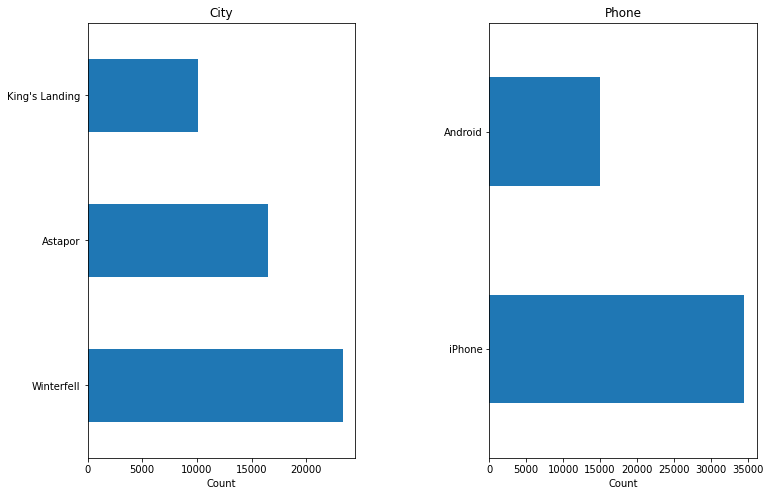

In [27]:
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df['city'].value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'City'
ax[0].set_title('City')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df['phone'].value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'Phone'
ax[1].set_title('Phone')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);

The city with the most trips from the plot is Winterfell and it appears most of drivers favor the use of iPhones.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
# convert signup_date and last_trip_date to pandas datetime objects
df['signup_date'] = df['signup_date'].apply(pd.to_datetime)
df['last_trip_date'] = df['last_trip_date'].apply(pd.to_datetime)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [31]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [31]:
#df['phone'].replace({'iPhone':0, 'Android':1}, inplace=True)

In [32]:
# convert 'ultimate_black_user' to category since it's a boolean
# in order to map to [0, 1]
df['ultimate_black_user'] = df['ultimate_black_user'].astype('category')

In [33]:
df['ultimate_black_user'].dtypes

CategoricalDtype(categories=[False, True], ordered=False)

In [34]:
df['ultimate_black_user'] = [1 if i else 0 for i in df['ultimate_black_user']]

In [35]:
df['ultimate_black_user'].unique()

array([1, 0])

In [36]:
# extract month, day, year from last_trip_date
df['last_trip_date_month'] = df['last_trip_date'].dt.month
df['last_trip_date_day'] = df['last_trip_date'].dt.day
df['last_trip_date_year'] = df['last_trip_date'].dt.year

In [37]:
# extract month, day, year from last_trip_date
df['signup_date_month'] = df['signup_date'].dt.month
df['signup_date_day'] = df['signup_date'].dt.day
df['signup_date_year'] = df['signup_date'].dt.year

In [38]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                    1   
1       1.00     2014-05-05  Android        0.0                    0   
2       1.00     2014-01-07   iPhone        0.0                    0   
3       1.14     2014-06-29   iPhone       20.0                    1   
4       1.19     2014-03-15  Android       11.8                    0   

   weekday_pct  avg_dist  avg_rating_by_driver  last_trip_date_month  \
0         46.2      3.67                   5.0                     6   
1         50.0      8.26                   5.0                     5   
2        100.0      0.77                   5.0                     1   
3         80.0      2.36                   4.9                     6   
4         82.4      3.13                   4.9                     3   

   last_trip_date_day  last_trip_date_year  signup_date_month  \
0                  17                 2014                  1   
1                   5                 2014                  1   
2                   7                 2014                  1   
3                  29                 2014                  1   
4                  15                 2014                  1   

   signup_date_day  signup_date_year  
0               25              2014  
1               29              2014  
2                6              2014  
3               10              2014  
4               27              2014

In [39]:
df['last_trip_date_month'].unique()

array([6, 5, 1, 3, 2, 7, 4])

In [40]:
df['last_trip_date_month'].value_counts()

6    18256
1    10147
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_trip_date_month, dtype: int64

In [41]:
#df['trips_in_first_30_days'].value_counts()

In [41]:
# create the target variable 'retained'
df['retained'] = [0 if i<6 else 1 for i in df['last_trip_date_month']]
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                    1   
1       1.00     2014-05-05  Android        0.0                    0   
2       1.00     2014-01-07   iPhone        0.0                    0   
3       1.14     2014-06-29   iPhone       20.0                    1   
4       1.19     2014-03-15  Android       11.8                    0   

   weekday_pct  avg_dist  avg_rating_by_driver  last_trip_date_month  \
0         46.2      3.67                   5.0                     6   
1         50.0      8.26                   5.0                     5   
2        100.0      0.77                   5.0                     1   
3         80.0      2.36                   4.9                     6   
4         82.4      3.13                   4.9                     3   

   last_trip_date_day  last_trip_date_year  signup_date_month  \
0                  17                 2014                  1   
1                   5                 2014                  1   
2                   7                 2014                  1   
3                  29                 2014                  1   
4                  15                 2014                  1   

   signup_date_day  signup_date_year  retained  
0               25              2014         1  
1               29              2014         0  
2                6              2014         0  
3               10              2014         1  
4               27              2014         0

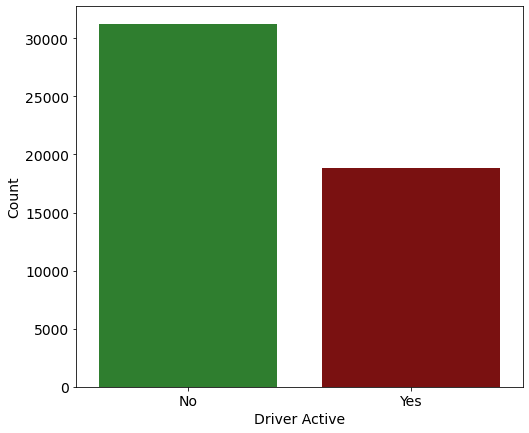

In [42]:
# distribution of target variable 'retained'
plt.figure(figsize=(8,7))
sns.countplot(x='retained', data=df, palette=['forestgreen', 'darkred'])
plt.xticks([0,1], ['No', 'Yes'], fontsize= 14, color='black')
plt.yticks(fontsize= 14, color='black')
plt.xlabel('Driver Active', fontsize=14, color='black')
plt.ylabel('Count',fontsize=14, color='black')
plt.show()

In [48]:
df['retained'].value_counts(normalize=True)

0    0.62392
1    0.37608
Name: retained, dtype: float64

Fraction of those that was retained are 37.608% as compared to 62.4% who did not retain in their 6th month.

In [43]:
# distribution of drivers who were still active in their 6th month by city
city_retained = df.groupby(['city', 'retained']).size().unstack()

<AxesSubplot:title={'center':'Active drivers after 6th month and non active drivers for each city'}, ylabel='city'>

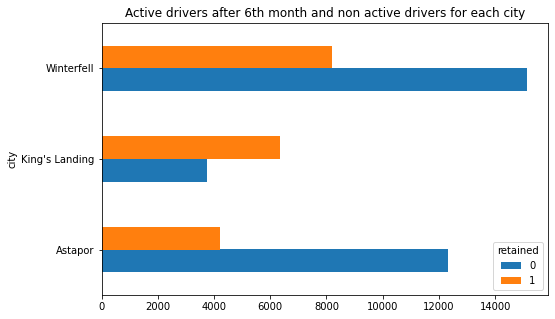

In [44]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
city_retained.plot(ax=ax,kind='barh',title='Active drivers after 6th month and non active drivers for each city')

We can deduce from the above plot, drivers from Winterfell are likely to be retained as compared to King's Landing and Astapor.Most drivers are also likely to leave before the 6th month in Winterfell, followed by Astapor. On the average, drivers who would like to stay in King's Landing outweighs those who are likely to leave in the 6th month.

In [46]:
# average trips in the first 30 days after signup
monthly_resampled_data = df.resample('D', on='signup_date').mean()
monthly_resampled_data['trips_in_first_30_days']

signup_date
2014-01-01    1.517559
2014-01-02    2.034861
2014-01-03    2.166529
2014-01-04    2.282155
2014-01-05    2.564408
2014-01-06    2.836642
2014-01-07    2.518170
2014-01-08    2.232157
2014-01-09    2.272854
2014-01-10    2.266700
2014-01-11    2.037469
2014-01-12    1.947526
2014-01-13    2.426120
2014-01-14    2.344643
2014-01-15    2.164865
2014-01-16    2.288609
2014-01-17    2.335040
2014-01-18    2.221167
2014-01-19    2.171598
2014-01-20    2.251737
2014-01-21    2.642626
2014-01-22    2.430972
2014-01-23    2.412204
2014-01-24    2.367776
2014-01-25    2.133449
2014-01-26    2.306792
2014-01-27    2.661003
2014-01-28    2.558411
2014-01-29    2.181287
2014-01-30    2.146839
2014-01-31    2.289048
Freq: D, Name: trips_in_first_30_days, dtype: float64

<AxesSubplot:xlabel='signup_date'>

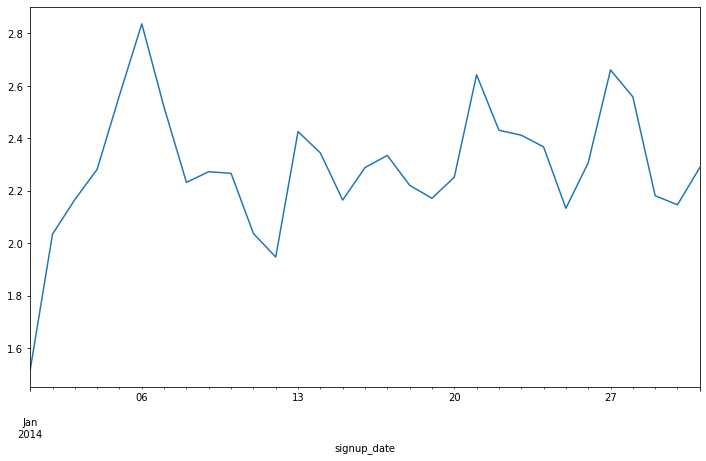

In [47]:
# plot of average trips in the first 30 days after signup
fig,ax = plt.subplots(1,1,figsize=(12,7))
monthly_resampled_data['trips_in_first_30_days'].plot(ax=ax)

There was a sharp rise in trips in the first 6 days and after a slow decline then a steady increase after the 6th day.

In [49]:
# descriptive statistics
df.describe().T

count         mean        std     min      25%  \
trips_in_first_30_days  50000.0     2.278200   3.792684     0.0     0.00   
avg_rating_of_driver    41878.0     4.601559   0.617338     1.0     4.30   
avg_surge               50000.0     1.074764   0.222336     1.0     1.00   
surge_pct               50000.0     8.849536  19.958811     0.0     0.00   
ultimate_black_user     50000.0     0.377080   0.484660     0.0     0.00   
weekday_pct             50000.0    60.926084  37.081503     0.0    33.30   
avg_dist                50000.0     5.796827   5.707357     0.0     2.42   
avg_rating_by_driver    49799.0     4.778158   0.446652     1.0     4.70   
last_trip_date_month    50000.0     4.042320   1.992879     1.0     2.00   
last_trip_date_day      50000.0    17.694300   8.950084     1.0    10.00   
last_trip_date_year     50000.0  2014.000000   0.000000  2014.0  2014.00   
signup_date_month       50000.0     1.000000   0.000000     1.0     1.00   
signup_date_day         50000.0    16.544680   8.754220     1.0     9.00   
signup_date_year        50000.0  2014.000000   0.000000  2014.0  2014.00   
retained                50000.0     0.376080   0.484405     0.0     0.00   

                            50%      75%      max  
trips_in_first_30_days     1.00     3.00   125.00  
avg_rating_of_driver       4.90     5.00     5.00  
avg_surge                  1.00     1.05     8.00  
surge_pct                  0.00     8.60   100.00  
ultimate_black_user        0.00     1.00     1.00  
weekday_pct               66.70   100.00   100.00  
avg_dist                   3.88     6.94   160.96  
avg_rating_by_driver       5.00     5.00     5.00  
last_trip_date_month       5.00     6.00     7.00  
last_trip_date_day        19.00    26.00    31.00  
last_trip_date_year     2014.00  2014.00  2014.00  
signup_date_month          1.00     1.00     1.00  
signup_date_day           17.00    24.00    31.00  
signup_date_year        2014.00  2014.00  2014.00  
retained                   0.00     1.00     1.00

In [50]:
# distribution report for all features
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

There appears to a strong relationship between retention and these features(`last_trip_date_day`, `trips_in_first_30_days`, `ultimate_black_user`)

In [51]:
df.head()

city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                    1   
1       1.00     2014-05-05  Android        0.0                    0   
2       1.00     2014-01-07   iPhone        0.0                    0   
3       1.14     2014-06-29   iPhone       20.0                    1   
4       1.19     2014-03-15  Android       11.8                    0   

   weekday_pct  avg_dist  avg_rating_by_driver  last_trip_date_month  \
0         46.2      3.67                   5.0                     6   
1         50.0      8.26                   5.0                     5   
2        100.0      0.77                   5.0                     1   
3         80.0      2.36                   4.9                     6   
4         82.4      3.13                   4.9                     3   

   last_trip_date_day  last_trip_date_year  signup_date_month  \
0                  17                 2014                  1   
1                   5                 2014                  1   
2                   7                 2014                  1   
3                  29                 2014                  1   
4                  15                 2014                  1   

   signup_date_day  signup_date_year  retained  
0               25              2014         1  
1               29              2014         0  
2                6              2014         0  
3               10              2014         1  
4               27              2014         0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  last_trip_date_month    50000 non-null  int64 

In [67]:
# drop columns before modeling
df = df.drop(columns=['signup_date', 'last_trip_date', 'last_trip_date_year', 'signup_date_year'])
df.head()

city  trips_in_first_30_days  avg_rating_of_driver  avg_surge  \
0  King's Landing                       4                   4.7       1.10   
1         Astapor                       0                   5.0       1.00   
2         Astapor                       3                   4.3       1.00   
3  King's Landing                       9                   4.6       1.14   
4      Winterfell                      14                   4.4       1.19   

     phone  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0   iPhone       15.4                    1         46.2      3.67   
1  Android        0.0                    0         50.0      8.26   
2   iPhone        0.0                    0        100.0      0.77   
3   iPhone       20.0                    1         80.0      2.36   
4  Android       11.8                    0         82.4      3.13   

   avg_rating_by_driver  last_trip_date_month  last_trip_date_day  \
0                   5.0                     6                  17   
1                   5.0                     5                   5   
2                   5.0                     1                   7   
3                   4.9                     6                  29   
4                   4.9                     3                  15   

   signup_date_month  signup_date_day  retained  
0                  1               25         1  
1                  1               29         0  
2                  1                6         0  
3                  1               10         1  
4                  1               27         0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  last_trip_date_month    50000 non-null  int64  
 11  last_trip_date_day      50000 non-null  int64  
 12  signup_date_month       50000 non-null  int64  
 13  signup_date_day         50000 non-null  int64  
 14  retained                50000 non-null

In [69]:
# fill in missing values with the median value
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median(), inplace=True)
#df['phone'].fillna(df['phone'].median(), inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median(), inplace=True)

In [70]:
# fill in missing values with 'Unknown'
df['phone'].fillna('Unknown', inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  last_trip_date_month    50000 non-null  int64  
 11  last_trip_date_day      50000 non-null  int64  
 12  signup_date_month       50000 non-null  int64  
 13  signup_date_day         50000 non-null  int64  
 14  retained                50000 non-null

## Modeling<a id='Modeling'></a>

In [72]:
# target and features
X = df.drop(columns=['retained', 'last_trip_date_month'], axis=1)
y = df['retained']

# create dummy features for X
X = pd.get_dummies(X, drop_first=True)

In [73]:
X.head()

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                       4                   4.7       1.10       15.4   
1                       0                   5.0       1.00        0.0   
2                       3                   4.3       1.00        0.0   
3                       9                   4.6       1.14       20.0   
4                      14                   4.4       1.19       11.8   

   ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                    1         46.2      3.67                   5.0   
1                    0         50.0      8.26                   5.0   
2                    0        100.0      0.77                   5.0   
3                    1         80.0      2.36                   4.9   
4                    0         82.4      3.13                   4.9   

   last_trip_date_day  signup_date_month  signup_date_day  \
0                  17                  1               25   
1                   5                  1               29   
2                   7                  1                6   
3                  29                  1               10   
4                  15                  1               27   

   city_King's Landing  city_Winterfell  phone_Unknown  phone_iPhone  
0                    1                0              0             1  
1                    0                0              0             0  
2                    0                0              0             1  
3                    1                0              0             1  
4                    0                1              0             0

In [83]:
# import libraries
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,recall_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import datetime
import lightgbm as lgb
from bayes_opt import BayesianOptimization

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
X_train.shape, X_test.shape

((37500, 15), (12500, 15))

In [76]:
y_train.shape, y_test.shape

((37500,), (12500,))

In [77]:
# scale training and test set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Dummy Classifier<a id='Dummy_Classifier'></a>

In [78]:
# fit a dummy classifier
strategies = ['most_frequent', 'stratified', 'uniform'] 

test_scores = []
test_prob = []
for s in strategies:
    dum_clf = DummyClassifier(strategy=s, random_state=42)
    dum_clf.fit(X_train_scaled, y_train)
    score = dum_clf.score(X_test_scaled, y_test)
    y_pred = dum_clf.predict_proba(X_test_scaled)
    test_prob.append(y_pred)
    test_scores.append(score)

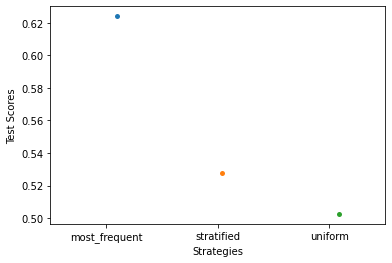

In [79]:
# plot scores against the strategies
ax = sns.stripplot(x=strategies, y=test_scores)
ax.set_xlabel('Strategies')
ax.set_ylabel('Test Scores')
plt.show()

### RandomForest Classifier<a id='RandomForest_Classifier'></a>

In [80]:
# instantiate RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# fit to the training set
rf_clf.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

# check accuracy score
print(accuracy_score(y_pred_rf, y_test))

0.80664


In [81]:
# create hyperparameter
param_grid = {'n_estimators': [50, 100, 200, 500, 1000],
                    'max_depth': [4, 5, 6, 7, 8, 10]}

# instantiate randomforestclassifier
rf_clf2 = RandomForestClassifier()

# create Randomizedsearch with 5-fold
rf_cv = RandomizedSearchCV(rf_clf2, param_grid, n_iter=15, cv=5, random_state=42)

# fit to the training set
best_model = rf_cv.fit(X_train_scaled, y_train)

# best hyperparameter values
print('Tuned Random Forest Parameters: {}'.format(best_model.best_params_))
print('Tuned GridSearch Random Forest Accuracy: {}'.format(best_model.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 500, 'max_depth': 10}
Tuned GridSearch Random Forest Accuracy: 0.798


In [82]:
# train and fit best parameters 
rf_best = RandomForestClassifier(n_estimators=500, max_depth=10)

# fit to the training set
rf_best.fit(X_train_scaled, y_train)

# predict on test set
y_pred_rf2 = rf_best.predict(X_test_scaled)

# check accuracy score
print(accuracy_score(y_pred_rf2, y_test))

0.79856


Accuracy = 0.80
Recall = 0.77



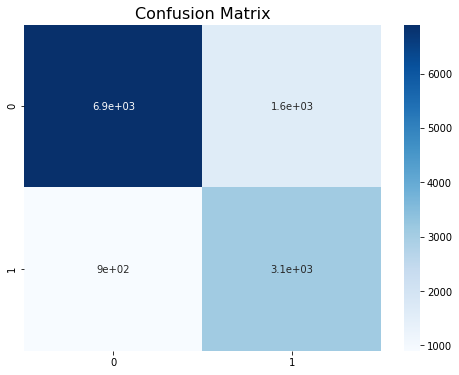

In [84]:
# confusion matrix
print(f'Accuracy = {accuracy_score(y_pred_rf2, y_test):.2f}\nRecall = {recall_score(y_pred_rf2, y_test):.2f}\n')
cm = confusion_matrix(y_pred_rf2, y_test)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

The RandomForest model is 80% accurate and yes, it can correctly classify most retention. It also classified 23% of non-retention as retained.

In [85]:
# feature importance
rf_importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_best.feature_importances_,3)})
rf_importances = rf_importances.sort_values('importance',ascending=False).set_index('feature')
rf_importances.head(20)

importance
feature                           
avg_rating_by_driver         0.156
city_King's Landing          0.125
surge_pct                    0.121
weekday_pct                  0.115
last_trip_date_day           0.112
avg_surge                    0.082
phone_iPhone                 0.067
trips_in_first_30_days       0.060
ultimate_black_user          0.054
avg_dist                     0.041
avg_rating_of_driver         0.030
signup_date_day              0.026
city_Winterfell              0.011
phone_Unknown                0.002
signup_date_month            0.000

The top 5 feature importance from the model;
* `avg_rating_by_driver`
* `city_King's Landing`
* `surge_pct`
* `weekday_pct`
* `last_trip_date_day`

### XGBoost Classifier<a id='XGBoost_Classifier'></a>

In [86]:
# instantiate the XGBClassifier
xg_boost = XGBClassifier(random_state=42, use_label_encoder=False, n_estimators=50, learning_rate=0.05)

# fit to the train set
xg_model = xg_boost.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_xg = xg_model.predict(X_test_scaled)

# check for accuracy
print(accuracy_score(y_pred_xg, y_test))

0.78776


In [87]:
# fine tune and train the model
from scipy import stats
from sklearn.model_selection import KFold

# create hyperparemeter
param_dist = {'n_estimators': stats.randint(50, 500),
              'learning_rate': stats.uniform(0.01, 0.6)
             }

# instantiate
xg_boost2 = XGBClassifier(objective = 'binary:logistic')

# create RandomizedSearch with 5 fold cv
numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)
xg_cv = RandomizedSearchCV(xg_boost2, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 10, 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1
                                    )
# fit to the training set
best_model = xg_cv.fit(X_train_scaled, y_train)

# best hyperparameter values
print('Tuned XGBoost Parameters: {}'.format(best_model.best_params_))
print('Tuned XGBoost Accuracy: {}'.format(best_model.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned XGBoost Parameters: {'learning_rate': 0.3221184638071451, 'n_estimators': 486}
Tuned XGBoost Accuracy: 0.907403816893574


In [88]:
# train and fit the best parameters
xg_best = XGBClassifier(objective = 'binary:logistic', learning_rate=0.3221184638071451, n_estimators=486)

# fit to the training set
xg_best.fit(X_train_scaled, y_train)

# predict on the test set
y_pred_xg2 = xg_best.predict(X_test_scaled)

# check for accuracy
print(accuracy_score(y_pred_xg2, y_test))

0.83352


Accuracy = 0.83
Recall = 0.79



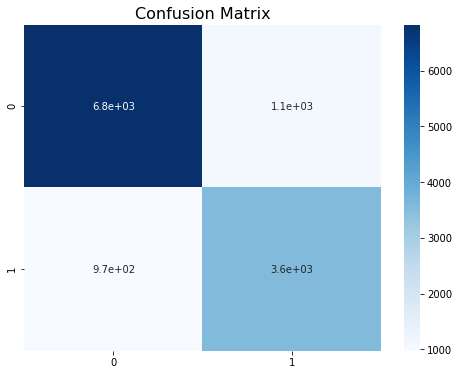

In [89]:
# confusion matrix
print(f'Accuracy = {accuracy_score(y_pred_xg2, y_test):.2f}\nRecall = {recall_score(y_pred_xg2, y_test):.2f}\n')
cm = confusion_matrix(y_pred_xg2, y_test)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

The XGBoost model is 83% accurate and it can correctly classify most retention. It also classified 21% of non-retention as retained.

In [90]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(xg_best.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

importance
feature                           
city_King's Landing          0.246
phone_iPhone                 0.178
ultimate_black_user          0.147
avg_rating_by_driver         0.130
surge_pct                    0.071
weekday_pct                  0.065
last_trip_date_day           0.056
city_Winterfell              0.030
trips_in_first_30_days       0.025
phone_Unknown                0.013
avg_rating_of_driver         0.012
signup_date_day              0.010
avg_dist                     0.009
avg_surge                    0.008
signup_date_month            0.000

The top 5 feature importance from the model;
* `city_King's Landing`
* `phone_iPhone`
* `ultimate_black_user`
* `avg_rating_by_driver`
* `surge_pct`

### Final Model Selection<a id='Final_Model_Selection'></a>

The `RandomForest` model will be selected as the best model as the `XGboost` model seems to be overfitting the data. The `XGBoost` model performed well on the training set with an accuracy of 90% after tuning the hyperparameters. On the test set the accuracy was dropped to 83%. With the `RandomForest` model, even after tuning the hyperparmeters, the accuracy was unchanged from the original model and the accuracy on the test set remained almost the same.

### Recommendations<a id='Recommendations'></a>

From the top 5 feature importance from both model, we see some come features like;
The top 5 feature importance from the model;
* `city_King's Landing`
* `avg_rating_by_driver`
* `surge_pct`

<br>
1. The might try creating initiatives for other drivers from the other cities to encourage more activities if they want to retain those drivers.
<br>
2. Average rating by the driver also should be taking into considerations that drivers are well taking care of because any negative rating would affect the company.
<br>
3. On weekdays, customers should be encouraged by providing them with some incentives or discount for ridership. Intensive ads can also be done by the marketing team to target prospective customers in the various cities.